# Exploratory Data Plots

A file that produces exploratory plots of total energy supply data for EU and european zone countries from the eurostat

## Load packages

In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read Data

In [316]:
# Read data using pandas
data = pd.read_csv("/Users/elizabeth/Documents/Master's Project/Data/EU_TotalEnergySupply.csv")

# Create list of column names
data.columns.values.tolist()
# Rename columns to make life easier
data.columns = [c.replace(' ', '_') for c in data.columns] # remove spaces
data.columns = [c.replace('(', '') for c in data.columns] # remove open parenthesis
data.columns = [c.replace(')', '') for c in data.columns] # remove close parenthesis
data.columns.values.tolist()

# Get rid of ':' and shorten other names
data = data.replace([':'],'')
data = data.replace(['European Union - 27 countries (from 2020)'],'EU')
data = data.replace(['Euro area - 19 countries  (from 2015)'],'Euro area')
data = data.replace(['Germany (until 1990 former territory of the FRG)'],'Germany')
data = data.replace(['Kosovo (under United Nations Security Council Resolution 1244/99)'],'Kosovo')
data

,Country,Year,Total_GWH,Solid_fossil_fuels,Peat_and_peat_products,Oil_and_petroleum_products,Natural_gas,Renewables_and_biofuels,Nuclear_heat,Solar_Thermal,Wind,Hydro,Geothermal,Ambient_Heat,Tide_wave_and_ocean,Biofuels_solid,Biofuels_other,Biofuels
0,EU,2020,15376646.97,1631844.953,20411.577,4874968.324,3802391.082,2787989.886,2037286.127,51910.962,397418.088,346248.584,80103.64,152766.504,508.764,1125302.724,14691.798,1139994.52
1,Euro area,2020,12036498.17,874986.78,19501.635,4004745.311,3202651.484,2076231.415,1679094.077,49036.721,326264.449,245472.258,76705.588,120441.149,508.764,730527.444,13481.215,744008.66
2,Belgium,2020,584305.929,27348.722,0,214836.666,176529.631,57315.642,97342.646,313.722,12763.6,266.9,42.25,1521.111,0,21430.167,72.258,21502.42
3,Bulgaria,2020,205829.885,49810.017,0,48533.577,29251.219,29656.944,50412.294,318.718,1477.131,2820.398,415.278,1297.89,0,18713.823,0,18713.82
4,Czechia,2020,466327.374,141753.811,0,98810.425,84621.075,59584.29,87181.916,219.055,699.083,2143.884,0,2718.497,0,39157.104,0,39157.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,Bosnia and Herzegovina,2011,,,,,,,,,,,,,,,,0.00
416,Kosovo,2011,29402.172,18874.32,0,7188.558,0,2921.295,0,2.778,0.281,104.625,0,0,0,2813.611,0,2813.61
417,Moldova,2011,29840.022,1383.808,0,9207.158,9746.5,6356.556,0,0,0,76,0,0,0,6280.556,0,6280.56
418,Ukraine,2011,1472590.362,481284.115,1205.552,144749.333,544902,30659.528,276079.833,0,89.5,10945.9,0,0,0,20290.556,0,20290.56


## Plots used to make decision about imputing data
Plot using pandas 

In [317]:
# Change total_GWH data type to float
data['Total_GWH'] = pd.to_numeric(data['Total_GWH'])
data['Solid_fossil_fuels'] = pd.to_numeric(data['Solid_fossil_fuels'])
data[data.columns[2:]] = data[data.columns[2:]].apply(pd.to_numeric, errors ='coerce')
# Make sure it worked and check data type
data.dtypes

Country                        object
Year                            int64
Total_GWH                     float64
Solid_fossil_fuels            float64
Peat_and_peat_products        float64
Oil_and_petroleum_products    float64
Natural_gas                   float64
Renewables_and_biofuels       float64
Nuclear_heat                  float64
Solar_Thermal                 float64
Wind                          float64
Hydro                         float64
Geothermal                    float64
Ambient_Heat                  float64
Tide_wave_and_ocean           float64
Biofuels_solid                float64
Biofuels_other                float64
Biofuels                      float64
dtype: object

In [295]:
# define index column
data.set_index('Year', inplace=True)

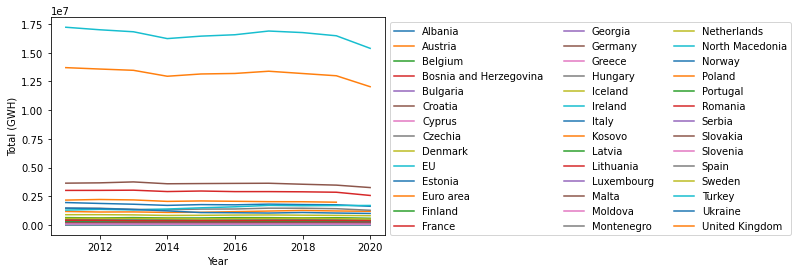

In [283]:
# Plot for total gigawatt hours
# group data by country as line plot
data.groupby('Country')['Total_GWH'].plot(legend = True)
plt.ylabel("Total (GWH)")
plt.legend(ncol=3,bbox_to_anchor =(1, 1))
plt.savefig('Total.png', bbox_inches = 'tight')

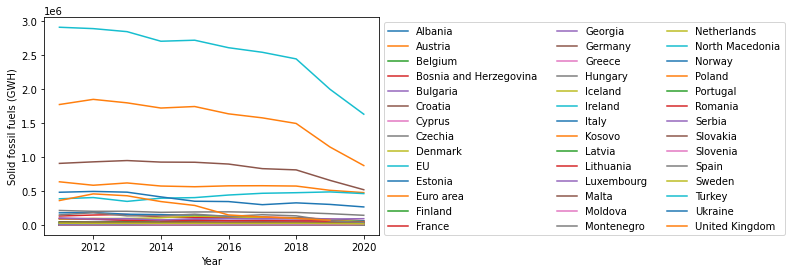

In [284]:
# Plot for Fossil fuels
data.groupby('Country')['Solid_fossil_fuels'].plot(legend=True)
plt.ylabel("Solid fossil fuels (GWH)")
plt.legend(ncol=3,bbox_to_anchor =(1, 1))
plt.savefig('FossilFuels.png', bbox_inches = 'tight')

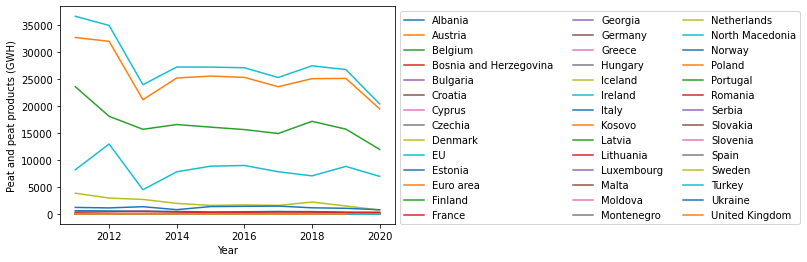

In [285]:
# Plot for peat and peat products
data.groupby('Country')['Peat_and_peat_products'].plot(legend = True)
plt.ylabel("Peat and peat products (GWH)")
plt.legend(ncol=3,bbox_to_anchor =(1, 1))
plt.savefig('PeatAndPeatProducts.png', bbox_inches = 'tight')

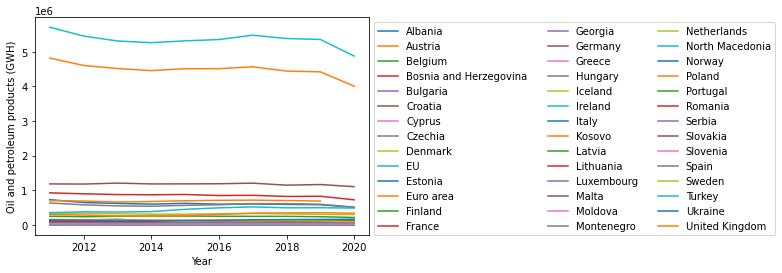

In [287]:
# Plot for oil and petroleum
data.groupby('Country')['Oil_and_petroleum_products'].plot(legend = True)
plt.ylabel("Oil and petroleum products (GWH)")
plt.legend(ncol=3,bbox_to_anchor =(1, 1))
plt.savefig('OilAndPetroleum.png', bbox_inches = 'tight')

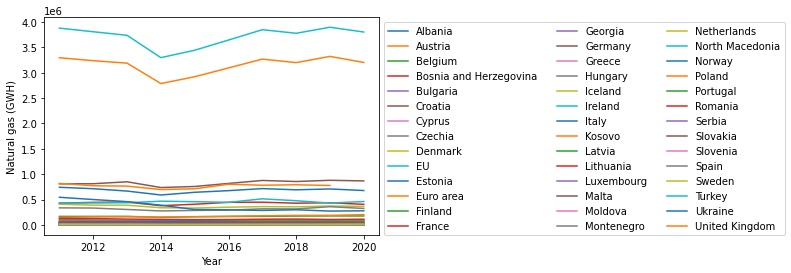

In [288]:
# Plot for natural gas
data.groupby('Country')['Natural_gas'].plot(legend = True)
plt.ylabel("Natural gas (GWH)")
plt.legend(ncol=3,bbox_to_anchor =(1, 1))
plt.savefig('NatrualGas.png', bbox_inches = 'tight')

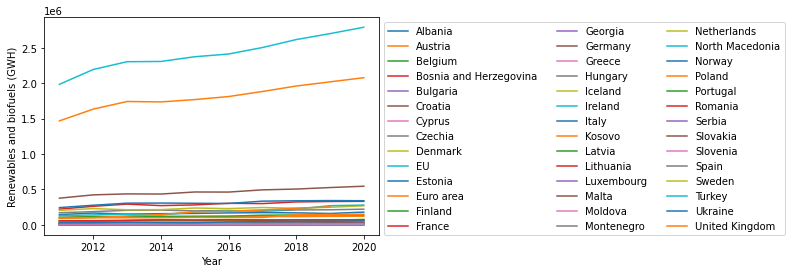

In [289]:
# Plot for renewables and biofuels
data.groupby('Country')['Renewables_and_biofuels'].plot(legend = True)
plt.ylabel("Renewables and biofuels (GWH)")
plt.legend(ncol=3,bbox_to_anchor =(1, 1))
plt.savefig('RenewablesAndBiofuels.png', bbox_inches = 'tight')

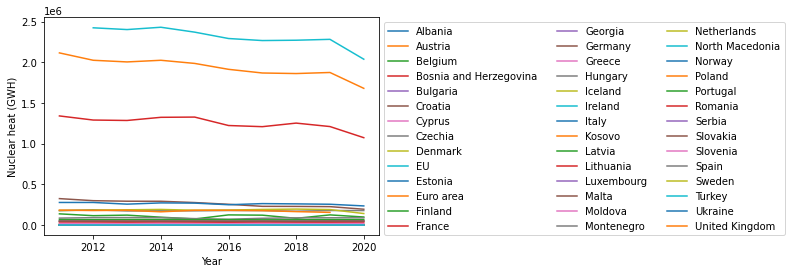

In [291]:
# Plot for Nuclear heat
data.groupby('Country')['Nuclear_heat'].plot(legend = True)
plt.ylabel("Nuclear heat (GWH)")
plt.legend(ncol=3,bbox_to_anchor =(1, 1))
plt.savefig('NuclearHeat.png', bbox_inches = 'tight')

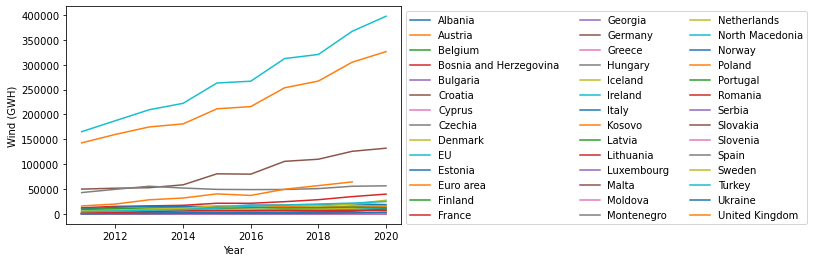

In [296]:
# Plot for wind
data.groupby('Country')['Wind'].plot(legend = True)
plt.ylabel("Wind (GWH)")
plt.legend(ncol=3,bbox_to_anchor =(1, 1))
plt.savefig('Wind.png', bbox_inches = 'tight')

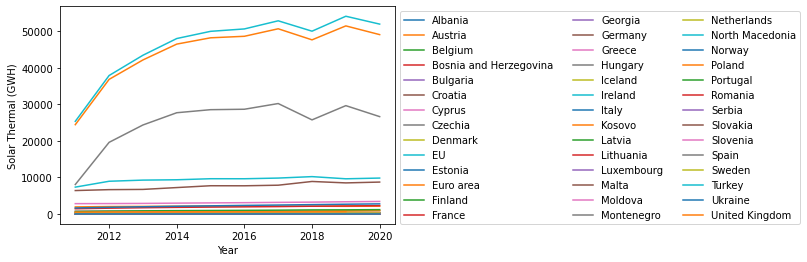

In [297]:
# Plot for solar thermal
data.groupby('Country')['Solar_Thermal'].plot(legend = True)
plt.ylabel("Solar Thermal (GWH)")
plt.legend(ncol=3,bbox_to_anchor =(1, 1))
plt.savefig('SolarThermal.png', bbox_inches = 'tight')

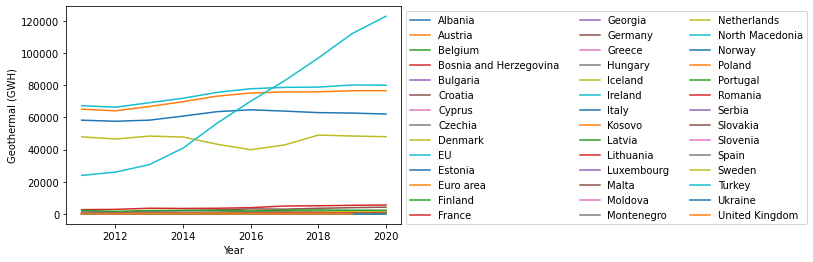

In [298]:
# Plot for geothermal
data.groupby('Country')['Geothermal'].plot(legend = True)
plt.ylabel("Geothermal (GWH)")
plt.legend(ncol=3,bbox_to_anchor =(1, 1))
plt.savefig('Geothermal.png', bbox_inches = 'tight')

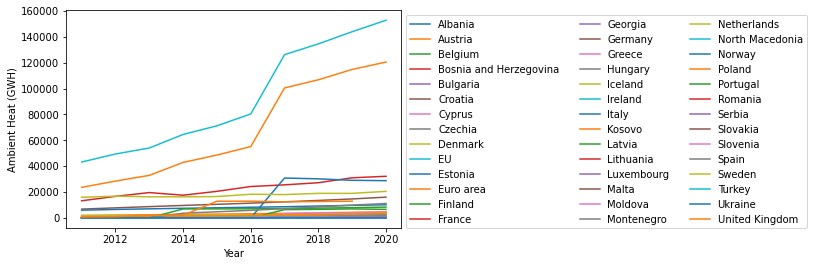

In [299]:
# Plot for Ambient Heat
data.groupby('Country')['Ambient_Heat'].plot(legend = True)
plt.ylabel("Ambient Heat (GWH)")
plt.legend(ncol=3,bbox_to_anchor =(1, 1))
plt.savefig('AmbientHeat.png', bbox_inches = 'tight')

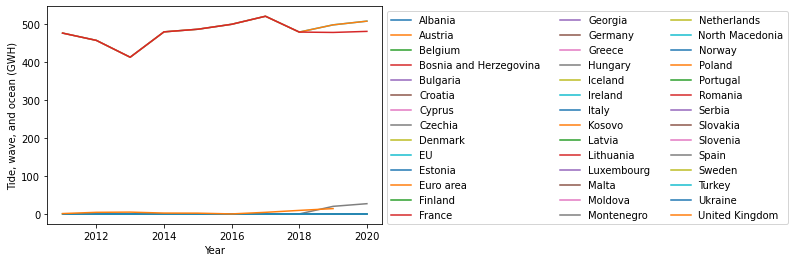

In [300]:
# Plot for Tide, wave, and ocean
data.groupby('Country')['Tide_wave_and_ocean'].plot(legend = True)
plt.ylabel("Tide, wave, and ocean (GWH)")
plt.legend(ncol=3,bbox_to_anchor =(1, 1))
plt.savefig('TideWaveAndOcean.png', bbox_inches = 'tight')

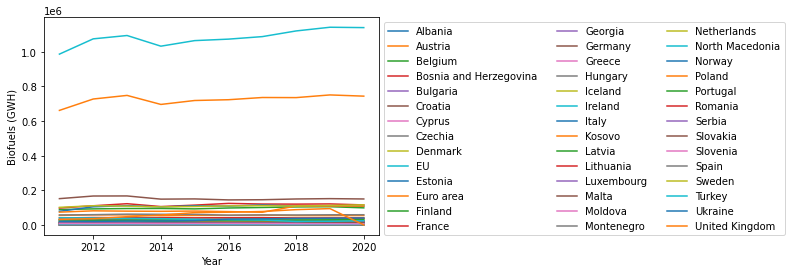

In [301]:
# Plot for biofuels
data.groupby('Country')['Biofuels'].plot(legend = True)
plt.ylabel("Biofuels (GWH)")
plt.legend(ncol=3,bbox_to_anchor =(1, 1))
plt.savefig('Biofuels.png', bbox_inches = 'tight')

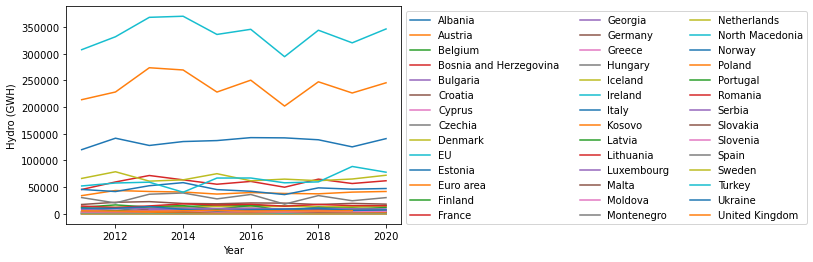

In [302]:
# Plot for solar thermal
data.groupby('Country')['Hydro'].plot(legend = True)
plt.ylabel("Hydro (GWH)")
plt.legend(ncol=3,bbox_to_anchor =(1, 1))
plt.savefig('Hydro.png', bbox_inches = 'tight')

## Missing Data
Impute missing data for UK, Bosnia/H, and Georgia

From: https://towardsdatascience.com/pandas-tricks-for-imputing-missing-data-63da3d14c0d6

In [318]:
frames = []
for i in list(set(data['Country'])):
            df_country = data[data['Country'] == i] 
            df_country['Total_GWH'].fillna(df_country['Total_GWH'].mean(),inplace = True)
            df_country['Solid_fossil_fuels'].fillna(df_country['Solid_fossil_fuels'].mean(), inplace = True)
            df_country['Peat_and_peat_products'].fillna(df_country['Peat_and_peat_products'].mean(), inplace = True)
            df_country['Solar_Thermal'].fillna(df_country['Solar_Thermal'].mean(), inplace = True)
            df_country['Oil_and_petroleum_products'].fillna(df_country['Oil_and_petroleum_products'].mean(), inplace = True)
            df_country['Natural_gas'].fillna(df_country['Natural_gas'].mean(), inplace = True)
            df_country['Renewables_and_biofuels'].fillna(df_country['Renewables_and_biofuels'].mean(), inplace = True)
            df_country['Nuclear_heat'].fillna(df_country['Nuclear_heat'].mean(),inplace = True)
            df_country['Hydro'].fillna(df_country['Hydro'].mean(),inplace = True)
            df_country['Geothermal'].fillna(df_country['Geothermal'].mean(),inplace = True)
            df_country['Ambient_Heat'].fillna(df_country['Ambient_Heat'].mean(),inplace = True)
            df_country['Tide_wave_and_ocean'].fillna(df_country['Tide_wave_and_ocean'].mean(),inplace = True)
            frames.append(df_country)
            final_df = pd.concat(frames)
#final_df[(final_df.Country == 'United Kingdom') & (final_df.Year == 2020)]
data = final_df

/Users/elizabeth/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [306]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

df = data.groupby(['Country']).mean()
with open('SummaryTable.tex', 'w') as tf:
    tf.write(df.to_latex())

In [215]:
np.random.rand(4,100).shape

(4, 100)

In [307]:
# Mean of each energy source
mins = data.min(axis = 0)
means = data.mean(axis = 0)
medians = data.median(axis = 0)
maxs = data.max(axis = 0)
summarydata = pd.concat([mins, means, medians, maxs], axis = 1)
summarydata

with open('EnergySummary.tex', 'w') as tf:
    tf.write(summarydata.to_latex())

In [321]:
np.corrcoef(data.drop(['Year','Country'], axis=1))

array([[1.        , 0.99783963, 0.99720944, ..., 0.83165016, 0.82661261,
        0.8209756 ],
       [0.99783963, 1.        , 0.999408  , ..., 0.86340458, 0.8588378 ,
        0.85364428],
       [0.99720944, 0.999408  , 1.        , ..., 0.86490593, 0.86055104,
        0.85593995],
       ...,
       [0.83165016, 0.86340458, 0.86490593, ..., 1.        , 0.99993795,
        0.99954022],
       [0.82661261, 0.8588378 , 0.86055104, ..., 0.99993795, 1.        ,
        0.99977211],
       [0.8209756 , 0.85364428, 0.85593995, ..., 0.99954022, 0.99977211,
        1.        ]])